In [1]:
import tensorflow as tf

from corpus import Corpus
import numpy as np

from tools import Timer
from tools import explog
from autoencoders import Autoencoder_ffnn
from genetic import evolution
from genetic import experiment

encode=10
dictsize=2000000
popsize=40


config = tf.ConfigProto()
config.gpu_options.allow_growth = True
#config.gpu_options.per_process_gpu_memory_fraction=1
corp_path="/mnt/permanent/Language/Hungarian/Corp/Webkorpusz/webkorpusz.wpl"#'/home/velkey/corp/webkorpusz.wpl'
corp=Corpus(corpus_path=corp_path,
            needed_corpus=["hun_lower"],
            language="Hun",size=dictsize,encoding_len=10)
database=corp.hun_lower
all_features=corp.featurize_data_charlevel_onehot(database)
train=all_features[0:int(len(all_features)*0.8)]
test=all_features[int(len(all_features)*0.8):len(all_features)]
x_train = train.reshape((len(train), np.prod(train.shape[1:])))
x_test = test.reshape((len(test), np.prod(test.shape[1:])))
print(x_train.shape)

logger=explog(encoder_type="Accuracy_tracker_"+str(encode),
              encoding_dim=encode,feature_len=10,
              lang="Hun",unique_words=len(set(database)),
              name="demo"+str(encode),population_size=popsize,
              words=len(corp.hun_lower))

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

exp=experiment(encoded_width=10,layermax=10,layermin=2,maxw=10,minw=3,out_dim=360)
exp.weights=[348, 254, 10, 254, 348, 360]
exp.len=len(exp.weights)

Reading file, speed:  1432023.0964418477  words/s
Reading file, speed:  2149201.358500157  words/s
Corpus initalized, fields: ['hun_lower'] 
Unique words:  214708
(996739, 360)


In [2]:
encoder=Autoencoder_ffnn(experiment=exp,
                 logger=logger,tf_session=sess,
                 inputdim=360,
                 layerlist=exp.weights,
                 encode_index=int(exp.len/2-1),
                 optimizer =tf.train.AdamOptimizer(learning_rate = 0.001),
                 nonlinear=tf.sigmoid)

In [3]:
encoder.train(x_train,x_test,512,50)

In [4]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os
%matplotlib inline

def show_performance(encoder,data,length=0,inputdepth=10,inputfsize=36):
    if isinstance(data,list):
        handmade=corp.featurize_data_charlevel_onehot(data)
        data=handmade.reshape((len(handmade), np.prod(handmade.shape[1:])))
        if length==0:
            length=len(data)
    a=data
    b=(encoder.reconstruct(a))
    
    characc=np.ones(inputdepth)*length
    for i in range(length):
        xa=corp.defeaturize_data_charlevel_onehot([a[i].reshape(inputdepth,inputfsize)])[0]
        xb=corp.defeaturize_data_charlevel_onehot([b[i].reshape(inputdepth,inputfsize)])[0]
        if i<length:
            print(xa,"\t",xb)
        for j in range(inputdepth):
            if (xa[j]!=xb[j]):
                characc[j]-=1
                
    print("\nAccuracy on data: ",encoder.char_accuracy(data)*100,"%")
    plt.plot([i for i in range(inputdepth)],characc/length)
    plt.show()


 motorhiba 	  katoráiba
     miatt 	      miatt
   feladni 	    feladni
         a 	          a
  versenyt 	   tersesőt
         a 	          a
   bajnoki 	    larkoki
sorrendben 	 sérrenyben
        az 	         az
    ötödik 	     ötödik
   helyett 	    helyett
  sikerült 	   sikerült
         a 	          a
    anyagi 	     anyagi
nehézségek 	 kelésségek
     miatt 	      miatt
 megszűnni 	  felszínni
         a 	          a
     forma 	      vomma
       így 	        így
     saját 	      saját
    került 	     került
        az 	         az
      évet 	       évet
         a 	          a
   szegedi 	    szededi
  egységes 	   egységes
      való 	       való
inditottam 	 hasztottam
         a 	          a
      első 	       első
  versenye 	   mensegye
     ismét 	      ismét
         a 	          a
  pozsonyi 	   tarhonyi
     grand 	      irand
      prix 	       iríd
      volt 	       volt
       itt 	        itt
    anyagi 	     anyagi
nehézségek 	 kelésségek
     miatt 	    

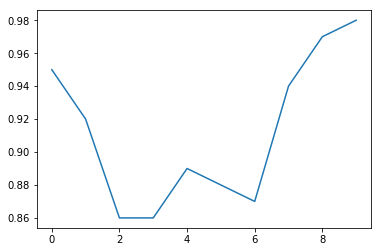

In [5]:
show_performance(encoder,x_test,100)

        eh 	         ed
    kecske 	     kerske
     kutya 	      kutva
     aytuk 	      attuk
    macska 	     manska
 árvíztűrő 	  kézöszörz
      fúró 	       tíró
     kacsa 	      kapsa
         a 	          a
        és 	         és

Accuracy on data:  84.0 %


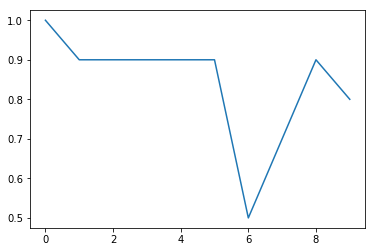

In [6]:
show_performance(["eh","kecske","kutya","aytuk","macska","árvíztűrő","fúró","kacsa","a","és"])